# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\admin\AppData\Local\Temp\ipykernel_15680\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


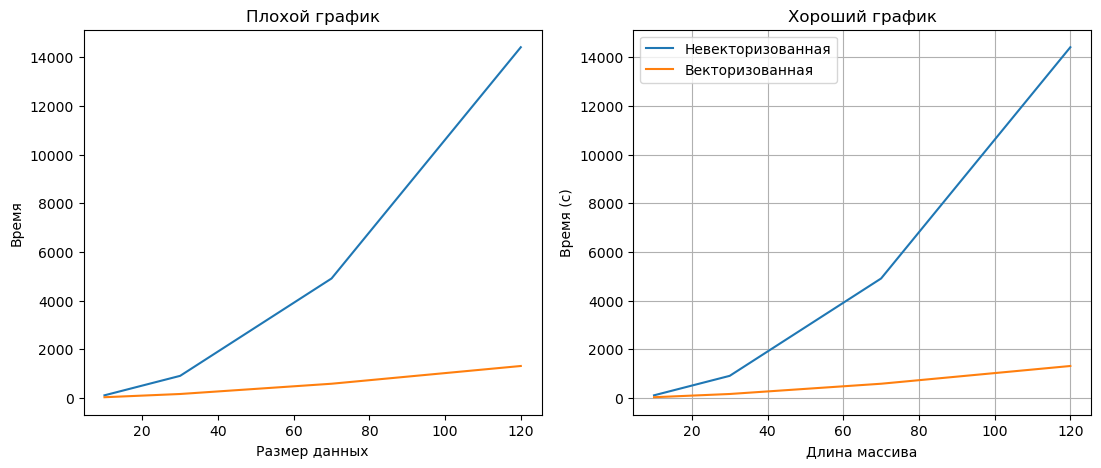

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

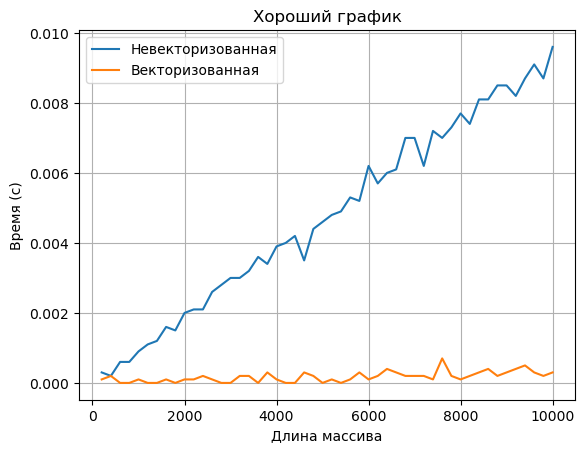

In [3]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

import functions as func
import functions_vectorized as func_vec

def gen_x(n, m):
    a = np.random.sample((n, m))
    return a

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(50):
    sz = i + 1
    sz *= 200
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    for j in range(10):
        x = gen_x(sz, sz)
        cur_time = time.time()
        func.prod_non_zero_diag(x)
        time_non_vec += time.time() - cur_time
        
        cur_time = time.time()
        func_vec.prod_non_zero_diag_vectorized(x)
        time_vec += time.time() - cur_time
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)

plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()

plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


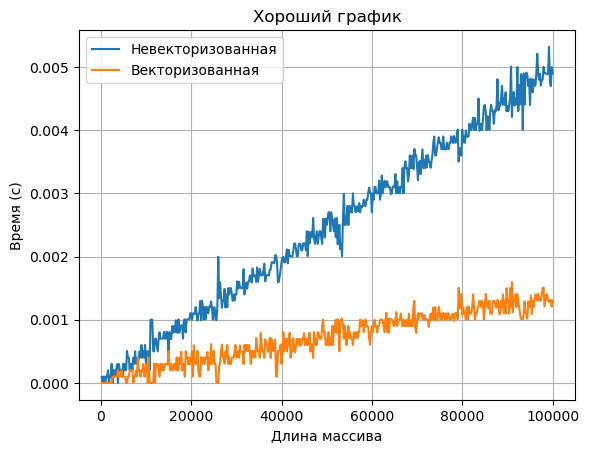

In [9]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

import functions as func
import functions_vectorized as func_vec

def gen_mas(n):
    a = np.random.randint(1, 100, size = n)
    return a

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(500):
    sz = i + 1
    sz *= 200
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    for j in range(10):
        x = gen_mas(sz)
        y = gen_mas(sz)
        
        cur_time = time.time()
        func.are_multisets_equal(x, y)
        time_non_vec += time.time() - cur_time
        
        cur_time = time.time()
        func_vec.are_multisets_equal(x, y)
        time_vec += time.time() - cur_time
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)

plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()

plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

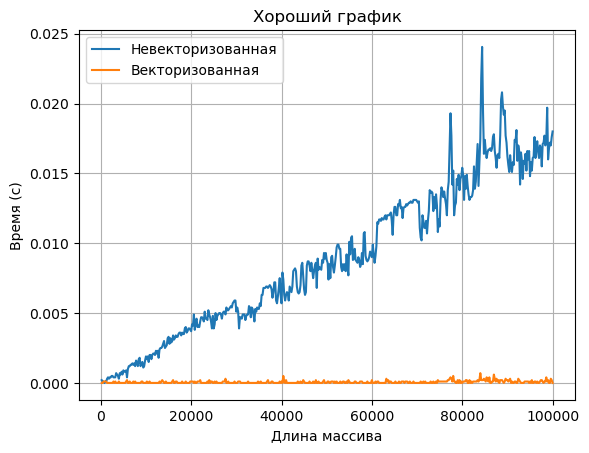

In [66]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

import functions as func
import functions_vectorized as func_vec

def gen_mas(n):
    a = np.random.randint(0, 100000, size = n)
    a[0] = 0
    return a

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(500):
    sz = i + 1
    sz *= 200
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    for j in range(10):
        x = gen_mas(sz)
        
        cur_time = time.time()
        func.max_after_zero(x)
        time_non_vec += time.time() - cur_time
        
        cur_time = time.time()
        func_vec.max_after_zero(x)
        time_vec += time.time() - cur_time
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)

plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()

plt.show()

 * __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).*



Time func 0.12599992752075195
Time func_vec 0.0029997825622558594


C:\Users\admin\AppData\Local\Temp\ipykernel_9268\3564914936.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


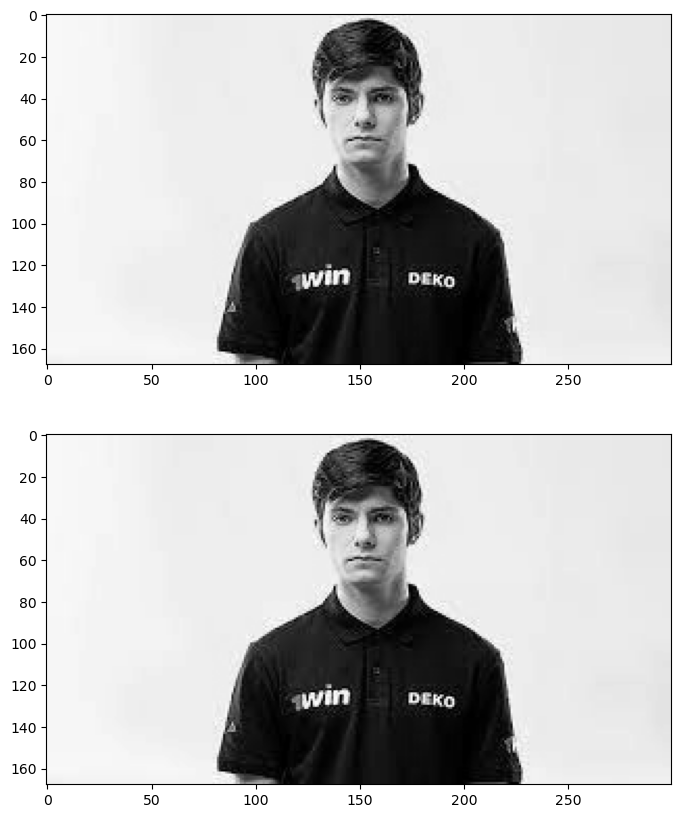

In [27]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import functions as func
import functions_vectorized as func_vec

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

img = np.asarray(Image.open('deko.jpg').convert('RGB'))
res_img = np.copy(img)
coefs = np.array([0.299, 0.587, 0.114])


cur_time = time.time()
res_img = Image.fromarray(func.convert_image(res_img, coefs)).convert('RGB')
print("Time func", time.time() - cur_time)
ax2.imshow(res_img)

res_img = np.copy(np.asarray(arr))
cur_time = time.time()
res_img = Image.fromarray(func_vec.convert_image(res_img, coefs)).convert('RGB')
print("Time func_vec", time.time() - cur_time)
ax1.imshow(res_img)


f.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

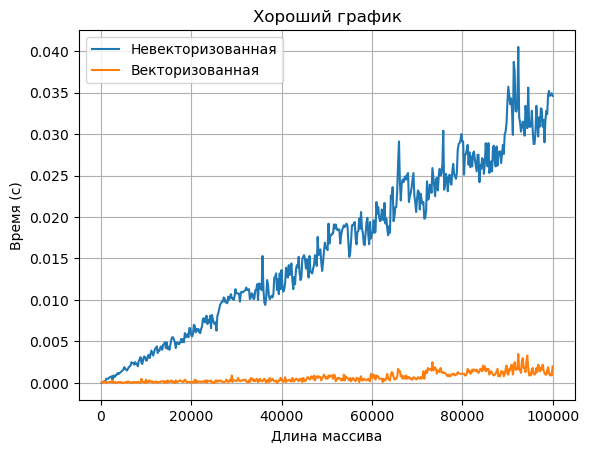

In [1]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

import functions as func
import functions_vectorized as func_vec

def gen_mas(n):
    a = np.random.randint(0, 100000, size = n)
    return a

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(500):
    sz = i + 1
    sz *= 200
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    for j in range(10):
        x = gen_mas(sz)
        
        cur_time = time.time()
        func.run_length_encoding(x)
        time_non_vec += time.time() - cur_time
        
        cur_time = time.time()
        func_vec.run_length_encoding(x)
        time_vec += time.time() - cur_time
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)

plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()

plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

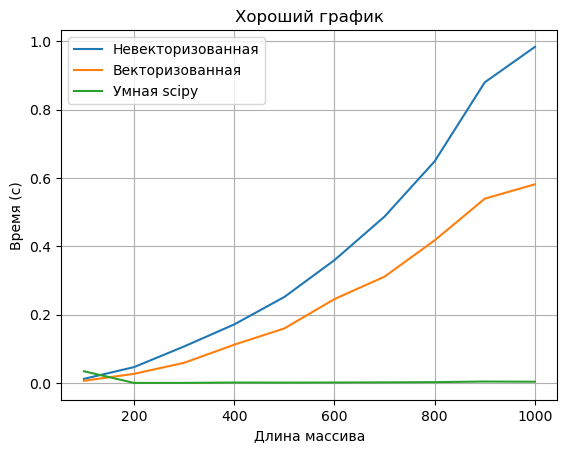

In [6]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy

import functions as func
import functions_vectorized as func_vec

def gen_mas(n):
    a = np.array([np.random.sample(2) for i in range(n)])
    return a
def smart_func(x, y):
    return scipy.spatial.distance.cdist(x, y)

data_size = []
time_non_vectorized = []
time_vectorized = []
time_smart_func = []

for i in range(10):
    sz = i + 1
    sz *= 100
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    time_smart_fun = 0
    for j in range(10):
        x = gen_mas(sz)
        y = gen_mas(sz)
        
        cur_time = time.time()
        func.pairwise_distance(x, y)
        time_non_vec += time.time() - cur_time
        
        cur_time = time.time()
        func_vec.pairwise_distance(x, y)
        time_vec += time.time() - cur_time
        
        cur_time = time.time()
        smart_func(x, y)
        time_smart_fun += time.time() - cur_time
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)
    time_smart_func.append(time_smart_fun / 10.0)

plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.plot(data_size, time_smart_func, label=u"Умная scipy")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()

plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

**Я ваших матерей ебал, дети шлюх**

*понятненько, мы проебали*

***Ты мразь ебанная, закрой свой рот***

~~Съебались с моего окна бомжи ебаные~~

# Блять
## что
### за
#### еблан
##### (с) Deko

[Мой кумир](https://www.youtube.com/watch?v=yYv6ePUH2BA)

***Старался делать самостоятельно, но иногда было соу хард, поэтому просил помощи у Газизова Данияра, и да все дз хуйня полная***